In [1]:
import pandas as pd
df = pd.read_csv("politic_combine.csv")
subdf = df[['title','class','sp_count','up_count','title_cha','title_word','cha_word','up_cha','up_word','bad_word']]

# real news
df0 = subdf['class']==0
df0 = subdf[df0]
# fake news
df1 = subdf['class']==1
df1 = subdf[df1]

In [2]:
# no. of title with bad words in REAL news
bad0 = df0['bad_word']==0
bad0 = df0[bad0]
bad1 = df0['bad_word']==1
bad1 = df0[bad1]

print('Number of titles without bad words in real news:', len(bad0.index))
print('Number of titles with bad words in real news:', len(bad1.index))
print('Percentage of titles without bad words in real news: {:.2f}'.format((len(bad0.index)/len(df0.index))*100))
print('Percentage of titles with bad words in real news: {:.2f}'.format((len(bad1.index)/len(df0.index))*100))


Number of titles without bad words in real news: 622
Number of titles with bad words in real news: 2
Percentage of titles without bad words in real news: 99.68
Percentage of titles with bad words in real news: 0.32


In [3]:
# no. of title with bad words in FAKE news
bad0 = df1['bad_word']==0
bad0 = df1[bad0]
bad1 = df1['bad_word']==1
bad1 = df1[bad1]

print('Number of titles without bad words in real news:', len(bad0.index))
print('Number of titles with bad words in real news:', len(bad1.index))
print('Percentage of titles without bad words: {:.2f}'.format((len(bad0.index)/len(df1.index))*100))
print('Percentage of titles with bad words: {:.2f}'.format((len(bad1.index)/len(df1.index))*100))

Number of titles without bad words in real news: 431
Number of titles with bad words in real news: 1
Percentage of titles without bad words: 99.77
Percentage of titles with bad words: 0.23


In [4]:
# t test for sp_count
from scipy import stats

t0 = df0['sp_count']
t1 = df1['sp_count']
stats.ttest_ind(t0,t1)

Ttest_indResult(statistic=-6.1980714275824, pvalue=8.188458373940181e-10)

In [5]:
# t test for up_count

t0 = df0['up_count']
t1 = df1['up_count']
stats.ttest_ind(t0,t1)

Ttest_indResult(statistic=-13.827422630705788, pvalue=4.380102547456306e-40)

In [6]:
# t test for sp_count

t0 = df0['up_cha']
t1 = df1['up_cha']
stats.ttest_ind(t0,t1)

Ttest_indResult(statistic=-9.205341813350383, pvalue=1.7832161695439979e-19)

In [7]:
count_real = len(df0.index)
count_fake = len(df1.index)
total = len(df.index)
print("percentage of real news is", (count_real/total)*100)
print("percentage of fake news is", (count_fake/total)*100)

percentage of real news is 59.09090909090909
percentage of fake news is 40.909090909090914


In [8]:
# logistic regression

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [9]:
x= subdf[['sp_count','up_count','title_cha','title_word','cha_word','up_cha','up_word','bad_word']]
y= subdf[['class']]

In [10]:
######################## regression with ALL features #################################
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# 70% of data = training, 30% = test, with random shuffling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
columns = x_train.columns

# logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[172  14]
 [ 63  68]]


In [12]:
# MCC
m = confusion_matrix
TP = m[1][1];
TN = m[0][0];
FN = m[1][0];
FP = m[0][1];
MCC = (TP*TN-FP*FN)/(np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)));
print('MCC =', MCC)

MCC = 0.49906071902547067


In [13]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.548561
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.189     
Dependent Variable: class            AIC:              1174.5618 
Date:               2019-08-28 19:57 BIC:              1214.2598 
No. Observations:   1056             Log-Likelihood:   -579.28   
Df Model:           7                LL-Null:          -714.41   
Df Residuals:       1048             LLR p-value:      1.3394e-54
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
sp_count       0.0264    0.0528   0.4990  0.6177  -0.0772   0.1299
up_count       0.3694    0.0364  10.1538  0.0000   0.2981   0.

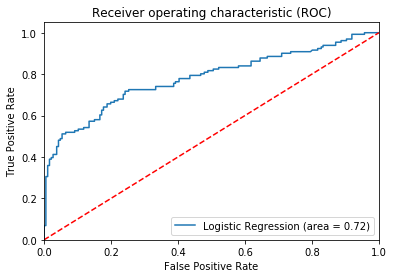

In [14]:
# ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [15]:
########### recursive features elimination #############
# keep 5 features

x= subdf[['sp_count','up_count','title_cha','title_word','cha_word','up_cha','up_word','bad_word']]
y= subdf[['class']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

rfe = RFE(logreg,n_features_to_select=5,step=1)
rfe = rfe.fit(x_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True False  True False  True]
[1 1 2 1 4 1 3 1]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
print(columns)

Index(['sp_count', 'up_count', 'title_cha', 'title_word', 'cha_word', 'up_cha',
       'up_word', 'bad_word'],
      dtype='object')


In [17]:
## regression with top 5 "best" features ##
x = subdf[['sp_count','up_count','title_word','up_cha','bad_word']]
y = subdf['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

m = confusion_matrix
TP = m[1][1];
TN = m[0][0];
FN = m[1][0];
FP = m[0][1];
MCC = (TP*TN-FP*FN)/(np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)));
print('MCC =', MCC)

[[176  10]
 [ 60  71]]
MCC = 0.551201416098822


In [19]:
############### recursive features elimination with 4 features ###############
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

x= subdf[['sp_count','up_count','title_cha','title_word','cha_word','up_cha','up_word','bad_word']]
y= subdf[['class']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

rfe = RFE(logreg,n_features_to_select=4,step=1)
rfe = rfe.fit(x_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ True  True False False False  True False  True]
[1 1 3 2 5 1 4 1]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
## regression with top 4 "best" features ##
x= subdf[['sp_count','up_count','up_cha','bad_word']]
y = subdf['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

m = confusion_matrix
TP = m[1][1];
TN = m[0][0];
FN = m[1][0];
FP = m[0][1];
MCC = (TP*TN-FP*FN)/(np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)));
print('MCC =', MCC)

[[176  10]
 [ 60  71]]
MCC = 0.551201416098822


In [22]:
############### recursive features elimination #################
############### keep 3 features

x= subdf[['sp_count','up_count','title_cha','title_word','cha_word','up_cha','up_word','bad_word']]
y= subdf[['class']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

logreg = LogisticRegression()

rfe = RFE(logreg,n_features_to_select=3,step=1)
rfe = rfe.fit(x_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[False  True False False False  True False  True]
[2 1 4 3 6 1 5 1]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
print(columns)

Index(['sp_count', 'up_count', 'title_cha', 'title_word', 'cha_word', 'up_cha',
       'up_word', 'bad_word'],
      dtype='object')


In [24]:
### regression with top 3 "best" features ##
x= subdf[['up_count','up_cha','bad_word']]
y = subdf['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

m = confusion_matrix
TP = m[1][1];
TN = m[0][0];
FN = m[1][0];
FP = m[0][1];
MCC = (TP*TN-FP*FN)/(np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)));
print('MCC =', MCC)

[[177   9]
 [ 61  70]]
MCC = 0.5532153692137166


Optimization terminated successfully.
         Current function value: 0.611957
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.095     
Dependent Variable: class            AIC:              1298.4536 
Date:               2019-08-28 19:57 BIC:              1313.3403 
No. Observations:   1056             Log-Likelihood:   -646.23   
Df Model:           2                LL-Null:          -714.41   
Df Residuals:       1053             LLR p-value:      2.4423e-30
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
up_count      0.2093    0.0196   10.6813  0.0000   0.1709   0.2477
up_cha       -0.1117    0.0109  -10.2542  0.0000  -0.1330  -0.

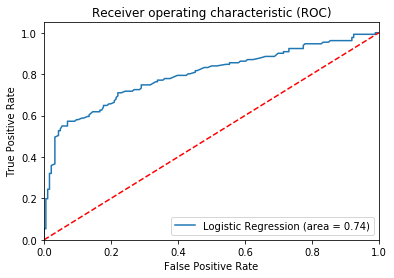

In [26]:
logit_model=sm.Logit(y,x)
result = logit_model.fit()
print(result.summary2())

#ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [27]:
############## recursive features elimination #################
############# keep 2 features

x= subdf[['sp_count','up_count','title_cha','title_word','cha_word','up_cha','up_word','bad_word']]
y= subdf[['class']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

logreg = LogisticRegression()

rfe = RFE(logreg,n_features_to_select=2,step=1)
rfe = rfe.fit(x_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False False False  True]
[3 1 5 4 7 2 6 1]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [28]:
##  regression with top 2 "best" features ##
x= subdf[['up_count','bad_word']]
y = subdf['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

m = confusion_matrix
TP = m[1][1];
TN = m[0][0];
FN = m[1][0];
FP = m[0][1];
MCC = (TP*TN-FP*FN)/(np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)));
print('MCC =', MCC)

[[177   9]
 [ 62  69]]
MCC = 0.5468571642757523


In [30]:
################
# from cross-validation 3 feautres produce the highest MCC
# MCC = 0.5532